In [21]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

In [22]:
def standardize_entry(entry):

    entry = entry.strip().lower()
    
    if entry.startswith("yes"):
        return 1
    elif entry.startswith("no"):
        return 0
    else:
        return None

def process_model_predictions(wiki_file, inpainting_file):

    df_wiki = pd.read_csv(wiki_file, header=None, on_bad_lines='skip')
    df_inpainting = pd.read_csv(inpainting_file, header=None, on_bad_lines='skip')

    df_wiki['predicted_label'] = df_wiki[0].apply(standardize_entry)
    df_inpainting['predicted_label'] = df_inpainting[0].apply(standardize_entry)

    df_wiki = df_wiki.dropna(subset=['predicted_label'])
    df_inpainting = df_inpainting.dropna(subset=['predicted_label'])

    df_wiki['true_label'] = 0
    df_inpainting['true_label'] = 1

    y_true_wiki = df_wiki['true_label'].tolist()
    y_pred_wiki = df_wiki['predicted_label'].tolist()

    y_true_inpainting = df_inpainting['true_label'].tolist()
    y_pred_inpainting = df_inpainting['predicted_label'].tolist()

    accuracy_wiki = accuracy_score(y_true_wiki, y_pred_wiki)
    accuracy_inpainting = accuracy_score(y_true_inpainting, y_pred_inpainting)

    df_combined = pd.concat([df_wiki, df_inpainting], ignore_index=True)
    y_true_combined = df_combined['true_label'].tolist()
    y_pred_combined = df_combined['predicted_label'].tolist()

    accuracy_combined = accuracy_score(y_true_combined, y_pred_combined)
    f1_combined = f1_score(y_true_combined, y_pred_combined)
    precision_combined = precision_score(y_true_combined, y_pred_combined)
    recall_combined = recall_score(y_true_combined, y_pred_combined)
    conf_matrix = confusion_matrix(y_true_combined, y_pred_combined)

    return {
        'accuracy_wiki': accuracy_wiki,
        'accuracy_inpainting': accuracy_inpainting,
        'accuracy_combined': accuracy_combined,
        'f1_combined': f1_combined,
        'precision_combined': precision_combined,
        'recall_combined': recall_combined,
        'confusion_matrix': conf_matrix,
        'num_wiki_entries': len(df_wiki),
        'num_inpainting_entries': len(df_inpainting),
        'num_combined_entries': len(df_combined)
    }


In [23]:
models = {
    'llava' : 1,
    'llava_llama' : 2,
    'minicpm' : 3,
    'bakllava' : 4,
    'llama3' : 5,
    'gemma3' : 6
}

for model, value in models.items():
    wiki_file = f'responses/prompt_1/{model}_wiki_responses_1.csv'
    inpainting_file = f'responses/prompt_1/{model}_inpainting_responses_1.csv'

    model_metrics = process_model_predictions(wiki_file, inpainting_file)

    print(f"Model Metrics {model} for prompt 1:")
    print(f"Accuracy (wiki): {model_metrics['accuracy_wiki']:.4f}")
    print(f"Accuracy (inpainting): {model_metrics['accuracy_inpainting']:.4f}")
    print(f"Accuracy (Combined): {model_metrics['accuracy_combined']:.4f}")
    print(f"F1 Score (Combined): {model_metrics['f1_combined']:.4f}")
    print(f"Precision (Combined): {model_metrics['precision_combined']:.4f}")
    print(f"Recall (Combined): {model_metrics['recall_combined']:.4f}")
    print("Confusion Matrix (Combined):")
    print(f"{model_metrics['confusion_matrix']}")
    print(f"Number of wiki Entries: {model_metrics['num_wiki_entries']}")
    print(f"Number of inpainting Entries: {model_metrics['num_inpainting_entries']}")
    print(f"Number of Combined Entries: {model_metrics['num_combined_entries']}\n")

Model Metrics llava for prompt 1:
Accuracy (wiki): 0.7932
Accuracy (inpainting): 0.2363
Accuracy (Combined): 0.5118
F1 Score (Combined): 0.3285
Precision (Combined): 0.5385
Recall (Combined): 0.2363
Confusion Matrix (Combined):
[[7049 1838]
 [6932 2145]]
Number of wiki Entries: 8887
Number of inpainting Entries: 9077
Number of Combined Entries: 17964

Model Metrics llava_llama for prompt 1:
Accuracy (wiki): 0.6895
Accuracy (inpainting): 0.4468
Accuracy (Combined): 0.5682
F1 Score (Combined): 0.5085
Precision (Combined): 0.5900
Recall (Combined): 0.4468
Confusion Matrix (Combined):
[[6895 3105]
 [5532 4468]]
Number of wiki Entries: 10000
Number of inpainting Entries: 10000
Number of Combined Entries: 20000

Model Metrics minicpm for prompt 1:
Accuracy (wiki): 0.9935
Accuracy (inpainting): 0.0352
Accuracy (Combined): 0.5143
F1 Score (Combined): 0.0676
Precision (Combined): 0.8441
Recall (Combined): 0.0352
Confusion Matrix (Combined):
[[9935   65]
 [9648  352]]
Number of wiki Entries: 100

In [24]:
for model, value in models.items():
    wiki_file = f'responses/prompt_2/{model}_wiki_responses_2.csv'
    inpainting_file = f'responses/prompt_2/{model}_inpainting_responses_2.csv'

    model_metrics = process_model_predictions(wiki_file, inpainting_file)

    print(f"Model Metrics {model} for prompt 2:")
    print(f"Accuracy (wiki): {model_metrics['accuracy_wiki']:.4f}")
    print(f"Accuracy (inpainting): {model_metrics['accuracy_inpainting']:.4f}")
    print(f"Accuracy (Combined): {model_metrics['accuracy_combined']:.4f}")
    print(f"F1 Score (Combined): {model_metrics['f1_combined']:.4f}")
    print(f"Precision (Combined): {model_metrics['precision_combined']:.4f}")
    print(f"Recall (Combined): {model_metrics['recall_combined']:.4f}")
    print("Confusion Matrix (Combined):")
    print(f"{model_metrics['confusion_matrix']}")
    print(f"Number of wiki Entries: {model_metrics['num_wiki_entries']}")
    print(f"Number of inpainting Entries: {model_metrics['num_inpainting_entries']}")
    print(f"Number of Combined Entries: {model_metrics['num_combined_entries']}\n")

Model Metrics llava for prompt 2:
Accuracy (wiki): 0.7430
Accuracy (inpainting): 0.3487
Accuracy (Combined): 0.5459
F1 Score (Combined): 0.4343
Precision (Combined): 0.5756
Recall (Combined): 0.3487
Confusion Matrix (Combined):
[[7429 2570]
 [6511 3486]]
Number of wiki Entries: 9999
Number of inpainting Entries: 9997
Number of Combined Entries: 19996

Model Metrics llava_llama for prompt 2:
Accuracy (wiki): 0.6687
Accuracy (inpainting): 0.4622
Accuracy (Combined): 0.5655
F1 Score (Combined): 0.5154
Precision (Combined): 0.5825
Recall (Combined): 0.4622
Confusion Matrix (Combined):
[[6687 3313]
 [5378 4622]]
Number of wiki Entries: 10000
Number of inpainting Entries: 10000
Number of Combined Entries: 20000

Model Metrics minicpm for prompt 2:
Accuracy (wiki): 0.9769
Accuracy (inpainting): 0.1514
Accuracy (Combined): 0.5229
F1 Score (Combined): 0.2587
Precision (Combined): 0.8890
Recall (Combined): 0.1514
Confusion Matrix (Combined):
[[7994  189]
 [8486 1514]]
Number of wiki Entries: 818

In [ ]:
file_path = "scoring/prompt_3.csv"
df = pd.read_csv(file_path)

stats = df.describe().loc[['mean']]

df['LLaVA Combined'] = df[['LLaVA wiki 3', 'LLaVA inpainting 3']].mean(axis=1)
df['LLaVA-LLaMA Combined'] = df[['LLaVA-LLaMA wiki 3', 'LLaVA-LLaMA inpainting 3']].mean(axis=1)
df['MiniCPM Combined'] = df[['minicpm wiki 3', 'minicpm inpainting 3']].mean(axis=1)
df['BakLLaVA Combined'] = df[['BakLLaVA wiki 3', 'BakLLaVA inpainting 3']].mean(axis=1)
df['Llama3 Combined'] = df[['Llama3 wiki 3', 'Llama3 inpainting 3']].mean(axis=1)
df['gemma3 Combined'] = df[['gemma3 wiki 3', 'gemma3 inpainting 3']].mean(axis=1)

combined_stats = df[['LLaVA Combined', 'LLaVA-LLaMA Combined', 'MiniCPM Combined', 'BakLLaVA Combined', 'Llama3 Combined', 'gemma3 Combined']].describe().loc[['mean']]

column_score_counts = {col: df[col].value_counts().sort_index() for col in df.columns[:-6]}
column_score_counts_df = pd.DataFrame(column_score_counts).fillna(0).astype(int)

score_counts = {}
models = {
    "LLaVA Combined": ['LLaVA wiki 3', 'LLaVA inpainting 3'],
    "LLaVA-LLaMA Combined": ['LLaVA-LLaMA wiki 3', 'LLaVA-LLaMA inpainting 3'],
    "MiniCPM Combined": ['minicpm wiki 3', 'minicpm inpainting 3'],
    "BakLLaVA Combined": ['BakLLaVA wiki 3', 'BakLLaVA inpainting 3'],
    "Llama3 Combined": ['Llama3 wiki 3', 'Llama3 inpainting 3'],
    "gemma3 Combined": ['gemma3 wiki 3', 'gemma3 inpainting 3']
}

for model, columns in models.items():
    score_counts[model] = df[columns].stack().value_counts().sort_index()

combined_score_counts_df = pd.DataFrame(score_counts).fillna(0).astype(int)
combined_score_counts_df = combined_score_counts_df.reindex([1, 2, 3, 4, 5], fill_value=0)

print("Per-column Mean:")
print(stats)
print("\nCombined Model Mean:")
print(combined_stats)
print("\nScore Distribution for Each Individual Column:")
print(column_score_counts_df)
print("\nScore Distribution for Combined Models:")
print(combined_score_counts_df)

#combined_score_counts_df.to_csv('score_distribution_combined_models_3.csv')

non_combined_score_counts = {col: df[col].value_counts().sort_index() for col in df.columns}
non_combined_score_counts_df = pd.DataFrame(non_combined_score_counts).fillna(0).astype(int)
non_combined_score_counts_df = non_combined_score_counts_df.reindex([1, 2, 3, 4, 5], fill_value=0)

#non_combined_score_counts_df.to_csv('score_distribution_non_combined_columns_3.csv')


Per-column Mean:
      LLaVA wiki 3  LLaVA inpainting 3  LLaVA-LLaMA wiki 3  \
mean          4.48                3.12                3.77   

      LLaVA-LLaMA inpainting 3  minicpm wiki 3  minicpm inpainting 3  \
mean                      2.89            4.49                  2.55   

      BakLLaVA wiki 3  BakLLaVA inpainting 3  Llama3 wiki 3  \
mean             3.92                   2.71           4.38   

      Llama3 inpainting 3  gemma3 wiki 3  gemma3 inpainting 3  
mean                 2.45           4.69                 2.24  

Combined Model Mean:
      LLaVA Combined  LLaVA-LLaMA Combined  MiniCPM Combined  \
mean             3.8                  3.33              3.52   

      BakLLaVA Combined  Llama3 Combined  gemma3 Combined  
mean              3.315            3.415            3.465  

Score Distribution for Each Individual Column:
   LLaVA wiki 3  LLaVA inpainting 3  LLaVA-LLaMA wiki 3  \
1             0                   0                  10   
2             2      

In [ ]:
file_path = "scoring/prompt_4.csv"
df = pd.read_csv(file_path)

stats = df.describe().loc[['mean']]

df['LLaVA Combined'] = df[['LLaVA wiki 4', 'LLaVA inpainting 4']].mean(axis=1)
df['LLaVA-LLaMA Combined'] = df[['LLaVA-LLaMA wiki 4', 'LLaVA-LLaMA inpainting 4']].mean(axis=1)
df['MiniCPM Combined'] = df[['minicpm wiki 4', 'minicpm inpainting 4']].mean(axis=1)
df['BakLLaVA Combined'] = df[['BakLLaVA wiki 4', 'BakLLaVA inpainting 4']].mean(axis=1)
df['Llama3 Combined'] = df[['Llama3 wiki 4', 'Llama3 inpainting 4']].mean(axis=1)
df['gemma3 Combined'] = df[['gemma3 wiki 4', 'gemma3 inpainting 4']].mean(axis=1)

combined_stats = df[['LLaVA Combined', 'LLaVA-LLaMA Combined', 'MiniCPM Combined', 'BakLLaVA Combined', 'Llama3 Combined', 'gemma3 Combined']].describe().loc[['mean']]

column_score_counts = {col: df[col].value_counts().sort_index() for col in df.columns[:-6]}
column_score_counts_df = pd.DataFrame(column_score_counts).fillna(0).astype(int)

score_counts = {}
models = {
    "LLaVA Combined": ['LLaVA wiki 4', 'LLaVA inpainting 4'],
    "LLaVA-LLaMA Combined": ['LLaVA-LLaMA wiki 4', 'LLaVA-LLaMA inpainting 4'],
    "MiniCPM Combined": ['minicpm wiki 4', 'minicpm inpainting 4'],
    "BakLLaVA Combined": ['BakLLaVA wiki 4', 'BakLLaVA inpainting 4'],
    "Llama3 Combined": ['Llama3 wiki 4', 'Llama3 inpainting 4'],
    "gemma3 Combined": ['gemma3 wiki 4', 'gemma3 inpainting 4']
}

for model, columns in models.items():
    score_counts[model] = df[columns].stack().value_counts().sort_index()

combined_score_counts_df = pd.DataFrame(score_counts).fillna(0).astype(int)
combined_score_counts_df = combined_score_counts_df.reindex([1, 2, 3, 4, 5], fill_value=0)

print("Per-column Mean:")
print(stats)
print("\nCombined Model Mean:")
print(combined_stats)
print("\nScore Distribution for Each Individual Column:")
print(column_score_counts_df)
print("\nScore Distribution for Combined Models:")
print(combined_score_counts_df)

#combined_score_counts_df.to_csv('score_distribution_combined_models_4.csv')

non_combined_score_counts = {col: df[col].value_counts().sort_index() for col in df.columns}
non_combined_score_counts_df = pd.DataFrame(non_combined_score_counts).fillna(0).astype(int)
non_combined_score_counts_df = non_combined_score_counts_df.reindex([1, 2, 3, 4, 5], fill_value=0)

#non_combined_score_counts_df.to_csv('score_distribution_non_combined_columns_4.csv')


Per-column Mean:
      LLaVA wiki 4  LLaVA inpainting 4  LLaVA-LLaMA wiki 4  \
mean           4.1                2.68                4.21   

      LLaVA-LLaMA inpainting 4  minicpm wiki 4  minicpm inpainting 4  \
mean                      2.78            3.89                  3.22   

      BakLLaVA wiki 4  BakLLaVA inpainting 4  Llama3 wiki 4  \
mean             3.46                   2.23           4.22   

      Llama3 inpainting 4  gemma3 wiki 4  gemma3 inpainting 4  
mean                 2.51           4.01                 3.81  

Combined Model Mean:
      LLaVA Combined  LLaVA-LLaMA Combined  MiniCPM Combined  \
mean            3.39                 3.495             3.555   

      BakLLaVA Combined  Llama3 Combined  gemma3 Combined  
mean              2.845            3.365             3.91  

Score Distribution for Each Individual Column:
   LLaVA wiki 4  LLaVA inpainting 4  LLaVA-LLaMA wiki 4  \
1             5                   4                   2   
2             7      

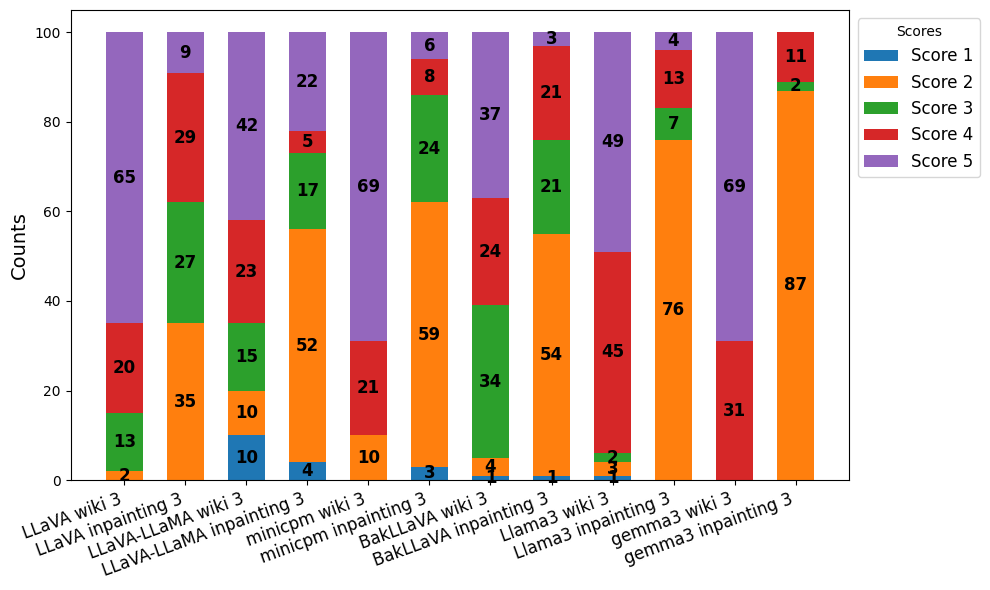

In [58]:
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('scoring/score_distribution_non_combined_columns_3.csv', header=None, usecols=range(1, 13))

models = df.iloc[0].tolist()
df = df.iloc[1:]

scores = {f'Score {i}': df.iloc[i - 1].astype(int).tolist() for i in range(1, df.shape[0] + 1)}

x = np.arange(len(models))
width = 0.6
fig, ax = plt.subplots(figsize=(10, 6))

bottom_values = np.zeros(len(models))

for score, values in scores.items():
    bars = ax.bar(x, values, width, label=score, bottom=bottom_values)

    for bar, value in zip(bars, values):
        if value > 0:
            ax.text(bar.get_x() + bar.get_width() / 2, 
                    bar.get_y() + bar.get_height() / 2,
                    str(value), ha='center', va='center', fontsize=12, color='black', fontweight='bold')

    bottom_values += values

ax.set_ylabel('Counts', fontsize=14)
ax.set_ylim(0, max(bottom_values) + 5)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=20, ha='right', fontsize=12)

ax.legend(title='Scores', fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


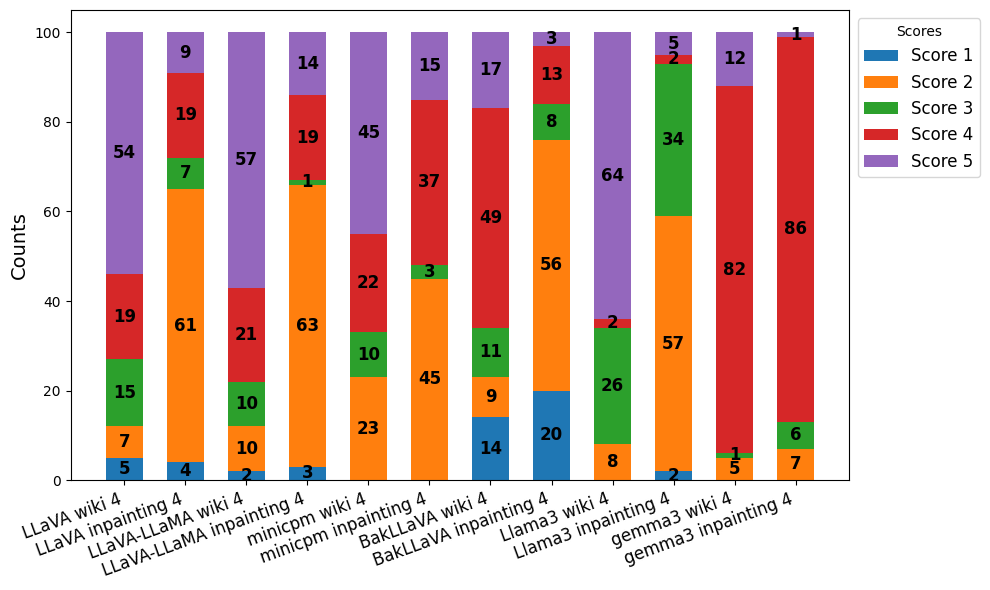

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('scoring/score_distribution_non_combined_columns_4.csv', header=None, usecols=range(1, 13))

models = df.iloc[0].tolist()
df = df.iloc[1:]

scores = {f'Score {i}': df.iloc[i - 1].astype(int).tolist() for i in range(1, df.shape[0] + 1)}

x = np.arange(len(models))
width = 0.6
fig, ax = plt.subplots(figsize=(10, 6))

bottom_values = np.zeros(len(models))

for score, values in scores.items():
    bars = ax.bar(x, values, width, label=score, bottom=bottom_values)

    for bar, value in zip(bars, values):
        if value > 0:
            ax.text(bar.get_x() + bar.get_width() / 2, 
                    bar.get_y() + bar.get_height() / 2,
                    str(value), ha='center', va='center', fontsize=12, color='black', fontweight='bold')

    bottom_values += values

ax.set_ylabel('Counts', fontsize=14)
ax.set_ylim(0, max(bottom_values) + 5)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=20, ha='right', fontsize=12)

ax.legend(title='Scores', fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()
